# Perform Statistical Analysis for AMR genes

This analysis is based on: https://www.kaggle.com/code/hamelg/python-for-data-25-chi-squared-tests

## Read Risk Scores

In [ ]:
import os

import pandas as pd


predictionsDir = os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/predictions'

predictionsDfList = []
for mortality in [7, 14, 30]:
    for wa in [1, 2, 3]:
        predictionsFile = predictionsDir + '/wb_365_wa_' + str(wa) + '/' + str(mortality) + '_day_mortality_normal.csv'
        plotDf = pd.read_csv(predictionsFile)
        plotDf['mortality'] = mortality
        plotDf['wa'] = wa
        predictionsDfList.append(plotDf)

predictionsDf = pd.concat(predictionsDfList, ignore_index=True)
predictionsDf

,person_id,JOURNEY_ID,preds,mortality,wa
0,51211,17360979,0.032720,7,1
1,51211,17371307,0.000055,7,1
2,51211,17419909,0.000245,7,1
3,51211,17422049,0.000019,7,1
4,51211,17495894,0.000153,7,1
...,...,...,...,...,...
8266,2678697,17471674,0.000848,30,3
8267,2679272,17485225,0.864064,30,3
8268,2680486,17502337,0.018188,30,3
8269,2682433,17536805,0.151517,30,3


## Read mapping information

In [2]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

,person_id,visit_occurrence_id,TYPE,COUNTRY_OF_BIRTH,SEX,Age_Bin,JOURNEY_ID
0,678487,3312694,Emergency,Australia,Male,"(60, 70]",3312694
1,2094045,9199249,Emergency,Australia,Male,"(20, 30]",9199249
2,2107813,9410987,Emergency,Australia,Male,"(50, 60]",9410987
3,2083212,602890,Inpatient,Australia,Female,"(40, 50]",9039437
4,2083212,9039437,Emergency,Australia,Female,"(40, 50]",9039437
...,...,...,...,...,...,...,...
7194,2603535,16588204,Inpatient,Australia,Male,"(60, 70]",16588204
7195,2603535,16709341,Inpatient,Australia,Male,"(60, 70]",16709341
7196,2603535,16651755,Inpatient,Australia,Male,"(60, 70]",16651755
7197,2098616,16872774,Emergency,Australia,Female,"(80, 90]",16872774


In [3]:
import os

mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [4]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

,person_id,JOURNEY_ID,tube_code
0,50056,13224842,AH20B011
1,62567,12645629,AH19G065
2,138108,14737781,AH21E052
3,211314,13955099,AH20J009
4,211314,13955099,KPN2214
...,...,...,...
512,2677962,17459522,ALF23C220
513,2684042,17565390,ALF23D001
514,2207334,15581117,AH21J066
515,2638484,16969999,ALF22K143


In [5]:
mergedDf = predictionsDf.merge(
    mappedJourneyTubeIdsDf,
    how='inner',
    on=['person_id', 'JOURNEY_ID']
)
mergedDf

,person_id,JOURNEY_ID,preds,mortality,wa,tube_code
0,138004,17354479,0.005408,7,1,ALF23C052
1,138004,17354479,0.010567,7,2,ALF23C052
2,138004,17354479,0.006408,7,3,ALF23C052
3,138004,17354479,0.031596,14,1,ALF23C052
4,138004,17354479,0.088641,14,2,ALF23C052
...,...,...,...,...,...,...
1051,2684042,17565390,0.002694,30,2,ALF23D001
1052,2684042,17565390,0.014253,30,3,ALF23D001
1053,2571565,16045917,0.019733,7,3,ALF22E058
1054,2571565,16045917,0.002638,14,3,ALF22E058


## Function to read annotations for the tube ids

In [6]:
def readAnnotations(tubeCodes):
    import os

    import pandas as pd


    highriskAnnotationsDfList = []
    controlAnnotationsDfList = []

    gffDir = os.environ['GENOMICS_DATA_BASE'] + '/amrfinder'

    for fileName in os.listdir(gffDir):

        tubeCode = fileName.split('.')[0].split('_')[0]

        amrResultsDf = pd.read_csv(
            gffDir + '/' + fileName,
            sep='\t',
        )
        amrResultsDf['tube_code'] = tubeCode

        if tubeCode in tubeCodes:
            highriskAnnotationsDfList.append(amrResultsDf)
        else:
            controlAnnotationsDfList.append(amrResultsDf)

    highriskAnnotationsDf = pd.concat(highriskAnnotationsDfList, ignore_index=True)
    controlAnnotationsDf = pd.concat(controlAnnotationsDfList, ignore_index=True)

    return highriskAnnotationsDf, controlAnnotationsDf

## Function to perform chi-square tests

In [7]:
def perform_chi2(highriskAnnotationsDf, controlAnnotationsDf, annotationTypes):

    import scipy.stats as stats

    import pandas as pd
    pd.options.mode.chained_assignment = None


    dfDict = {}

    for annotationType in annotationTypes:
    # for annotationType in ['AMR']:

        # print('annotationType: ', annotationType)

        highriskGenecountsDf = highriskAnnotationsDf[highriskAnnotationsDf['Element type'] == annotationType][['Contig id', 'Gene symbol']].groupby(
                by=['Gene symbol']
            ).agg(
                'count'
            ).reset_index().rename(columns={'Contig id': 'high_risk_genes_count'})

        controlGenecountsDf = controlAnnotationsDf[controlAnnotationsDf['Element type'] == annotationType][['Contig id', 'Gene symbol']].groupby(
                by=['Gene symbol']
            ).agg(
                'count'
            ).reset_index().rename(columns={'Contig id': 'control_genes_count'})

        mergedGenecountsDf = controlGenecountsDf.merge(
            highriskGenecountsDf,
            how='left',
            on=['Gene symbol']
        ).fillna(0)

        filteredGenecountsDf = mergedGenecountsDf[(mergedGenecountsDf.high_risk_genes_count >= 5) & (mergedGenecountsDf.high_risk_genes_count > 0)]

        filteredGenecountsDf.loc[:, 'control_genes_proportion'] = filteredGenecountsDf.control_genes_count/filteredGenecountsDf.control_genes_count.sum()

        filteredGenecountsDf.loc[:, 'expected_genes_count'] = filteredGenecountsDf.control_genes_proportion * filteredGenecountsDf.high_risk_genes_count.sum()

        if(filteredGenecountsDf.shape[0] < 2):
            print(annotationType, 'Not sufficient data for the test')
            continue

        chi2, p = stats.chisquare(f_obs=filteredGenecountsDf.high_risk_genes_count, f_exp=filteredGenecountsDf.expected_genes_count)
        significant = p < 0.05  # 5% significance level
        print(annotationType, chi2, p, significant)

        if significant:
            dfDict[annotationType] = filteredGenecountsDf

    return dfDict

## Analyse

In [8]:
mergedDf[['mortality', 'wa', 'preds']].groupby(by=['mortality', 'wa']).agg(['count'])

preds
             count
mortality wa      
7         1    117
          2    117
          3    118
14        1    117
          2    117
          3    118
30        1    117
          2    117
          3    118

In [41]:
finalDict = {}

for mortality in [7, 14, 30]:
    for wa in [1, 2, 3]:
        print('-------------------------------------------------------------------')
        print('mortality: ', mortality, ' wa: ', wa)
        print('-------------------------------------------------------------------')
        highriskTubecodes = list(mergedDf[(mergedDf['mortality'] == mortality) & (mergedDf['wa'] == wa) & (mergedDf['preds'] > 0.005)].tube_code)
        highriskAnnotationsDf, controlAnnotationsDf = readAnnotations(highriskTubecodes)
        controlAnnotationsDf[['Element type', 'Element subtype']].drop_duplicates()
        dfDict = perform_chi2(highriskAnnotationsDf, controlAnnotationsDf, ['VIRULENCE', 'AMR', 'STRESS'])

        for key in dfDict.keys():
            print('Annotation Category: ', key)
            tempDict = dfDict[key]
            tempDict.loc[:, 'ratio'] = tempDict.high_risk_genes_count/tempDict.expected_genes_count
            # tempDict = tempDict[tempDict.ratio > 2]
            tempDict['category'] = [key] * tempDict.shape[0]
            print(tempDict[['Gene symbol', 'high_risk_genes_count', 'expected_genes_count']])
            finalDict[(mortality, wa, key)] = tempDict

-------------------------------------------------------------------
mortality:  7  wa:  1
-------------------------------------------------------------------
VIRULENCE 35.680415513123954 0.1509176193656662 False
AMR 94.59545487967597 1.951476522541628e-09 True
STRESS 12.775406198778636 0.38557434210296504 False
Annotation Category:  AMR
                Gene symbol  high_risk_genes_count  expected_genes_count
5                 aac(6')-I                    8.0              5.075006
15   aac(6')-Ie/aph(2'')-Ia                    5.0              2.916942
29                     acrF                    8.0             20.655747
38                ant(6)-Ia                    5.0              1.280609
106                   blaEC                    7.0             15.794176
108                    blaI                    9.0             10.980035
242                   blaR1                    7.0              7.588793
286                    blaZ                    7.0              9.225127
318 

### Get results in a dataframe

In [42]:
import pandas as pd


dataDictList = []
for (mortality, wa, category) in finalDict.keys():
    dataDict = finalDict[(mortality, wa, category)]
    dataDict['mortality'] = [mortality]*dataDict.shape[0]
    dataDict['wa'] = [wa]*dataDict.shape[0]
    dataDictList.append(dataDict)
resultsDf = pd.concat(dataDictList, ignore_index=True)
resultsDf

,Gene symbol,control_genes_count,high_risk_genes_count,control_genes_proportion,expected_genes_count,ratio,category,mortality,wa
0,aac(6')-I,214,8.0,0.023605,5.075006,1.576353,AMR,7,1
1,aac(6')-Ie/aph(2'')-Ia,123,5.0,0.013567,2.916942,1.714124,AMR,7,1
2,acrF,871,8.0,0.096073,20.655747,0.387301,AMR,7,1
3,ant(6)-Ia,54,5.0,0.005956,1.280609,3.904393,AMR,7,1
4,blaEC,666,7.0,0.073461,15.794176,0.443201,AMR,7,1
...,...,...,...,...,...,...,...,...,...
500,silS,271,11.0,0.021164,8.846388,1.243445,STRESS,30,3
501,trxLHR,94,6.0,0.007341,3.068489,1.955360,STRESS,30,3
502,yfdX1,89,6.0,0.006950,2.905271,2.065212,STRESS,30,3
503,yfdX2,92,6.0,0.007185,3.003202,1.997868,STRESS,30,3


### AMR genes

In [43]:
resultsDf[resultsDf.category == 'AMR'].sort_values(by=['ratio'], ascending=False)[:20]

,Gene symbol,control_genes_count,high_risk_genes_count,control_genes_proportion,expected_genes_count,ratio,category,mortality,wa
3,ant(6)-Ia,54,5.0,0.005956,1.280609,3.904393,AMR,7,1
435,ant(6)-Ia,54,5.0,0.005252,1.628088,3.071087,AMR,30,3
169,erm(T),99,7.0,0.010551,2.310668,3.029427,AMR,14,1
367,ant(6)-Ia,54,5.0,0.004696,1.737391,2.877878,AMR,30,2
247,tet(L),115,7.0,0.011724,2.438577,2.870527,AMR,14,2
14,lsa(A),142,9.0,0.015663,3.367527,2.672584,AMR,7,1
237,lsa(A),143,8.0,0.014578,3.032317,2.638246,AMR,14,2
19,tet(L),115,7.0,0.012685,2.727223,2.566714,AMR,7,1
379,erm(T),98,8.0,0.008522,3.153043,2.537231,AMR,30,2
11,erm(T),100,6.0,0.011030,2.371498,2.530047,AMR,7,1


1. ANT(6)-Ia is an aminoglycoside nucleotidyltransferase gene encoded by plasmids and chromosomes in Staphylococcus epidermidis, E. faecium, Streptococcus suis, S. aureus, E. faecalis and Streptococcus mitis.

`Source: https://card.mcmaster.ca/ontology/39026#:~:text=ANT(6)%2DIa%20is,faecalis%20and%20Streptococcus%20mitis.`

2. erm(T) gene encodes the 23 s rRNA methyltransferase and confers erythromycin resistance in Gram-positive bacteria

`Source: https://www.sciencedirect.com/science/article/abs/pii/S0944501324000375#:~:text=The%20erm(T)%20gene%20encodes,gene%20in%20a%20clinical%20K.`

3. lsa(A) gene confers intrinsic resistance to lincosamides and streptogramin A (LSA phenotype)

`Source: https://academic.oup.com/jac/article/70/12/3205/2363964`

5. TetL is a tetracycline efflux protein found in many species of Gram-negative and Gram-positive bacteria (It confers Tetracycline resistance)

`Source: https://card.mcmaster.ca/ontology/36318#:~:text=TetL%20is%20a%20tetracycline%20efflux,negative%20and%20Gram%2Dpositive%20bacteria.`

In [44]:
resultsDf[resultsDf.category == 'STRESS'].sort_values(by=['ratio'], ascending=False)[:20]

,Gene symbol,control_genes_count,high_risk_genes_count,control_genes_proportion,expected_genes_count,ratio,category,mortality,wa
189,clpK,59,8.0,0.004669,1.545505,5.176302,STRESS,14,1
290,clpK,60,7.0,0.004749,1.586322,4.412725,STRESS,14,3
411,clpK,60,7.0,0.005191,1.588510,4.406645,STRESS,30,2
60,clpK,61,6.0,0.004915,1.430148,4.195369,STRESS,7,2
471,clpK,59,8.0,0.004608,1.925966,4.153759,STRESS,30,3
127,clpK,62,5.0,0.005080,1.336010,3.742487,STRESS,7,3
330,clpK,59,8.0,0.004629,2.203185,3.631107,STRESS,30,1
144,psi-GI,84,5.0,0.006882,1.810078,2.762312,STRESS,7,3
208,psi-GI,83,6.0,0.006569,2.174185,2.759655,STRESS,14,1
132,kefB-GI,86,5.0,0.007046,1.853175,2.698072,STRESS,7,3


The clpK gene is encoded by a conjugative plasmid and we find that the clpK gene alone renders an otherwise sensitive E. coli strain resistant to lethal heat shock

`Source: https://pubmed.ncbi.nlm.nih.gov/21085699/`

The newly discovered ClpK protein strongly promotes survival of Klebsiella pneumoniae biofilm subjected to heat shock

`Source: https://www.microbiologyresearch.org/content/journal/jmm/10.1099/jmm.0.032698-0`

### Plot

In [57]:
plotDf = resultsDf[resultsDf.category == 'STRESS'].sort_values(by=['ratio'], ascending=False)
plotDf = plotDf[['Gene symbol', 'high_risk_genes_count', 'expected_genes_count', 'mortality', 'wa']]
plotDf = plotDf.rename(columns={'high_risk_genes_count': 'Actual Count', 'expected_genes_count': 'Expected Count'})
plotDf = pd.melt(plotDf, id_vars=['Gene symbol', 'mortality', 'wa'], value_vars=['Actual Count', 'Expected Count'], var_name='Type', value_name='Gene Count')
plotDf

,Gene symbol,mortality,wa,Type,Gene Count
0,clpK,14,1,Actual Count,8.000000
1,clpK,14,3,Actual Count,7.000000
2,clpK,30,2,Actual Count,7.000000
3,clpK,7,2,Actual Count,6.000000
4,clpK,30,3,Actual Count,8.000000
...,...,...,...,...,...
521,asr,30,2,Expected Count,22.821595
522,arsR,14,3,Expected Count,11.580147
523,ymgB,30,2,Expected Count,22.159716
524,asr,7,2,Expected Count,20.256526


### Generate individual plots

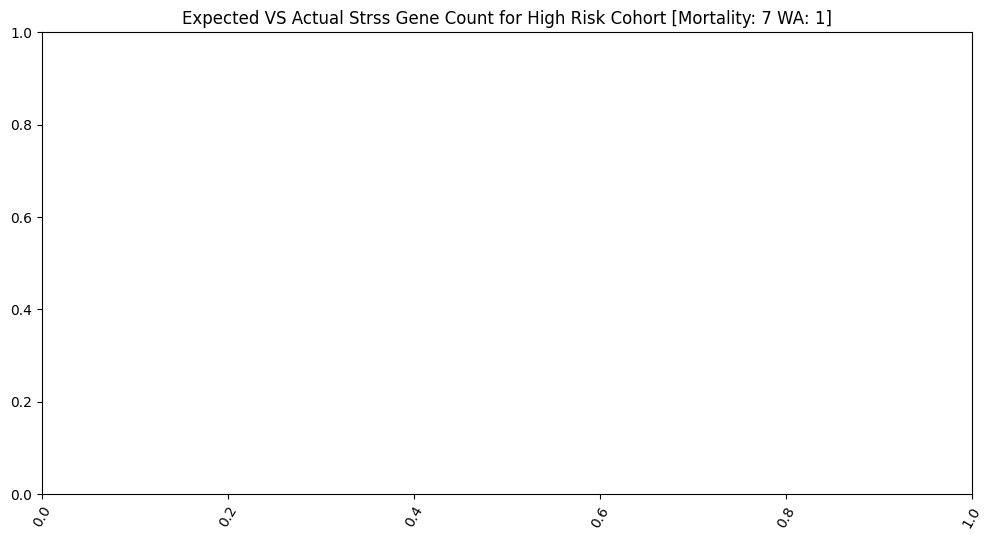

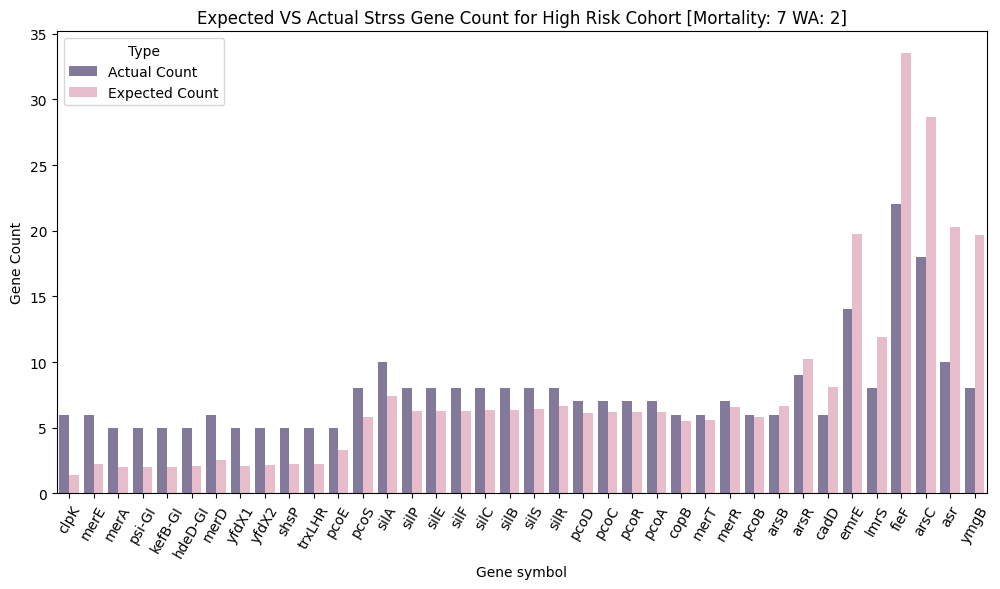

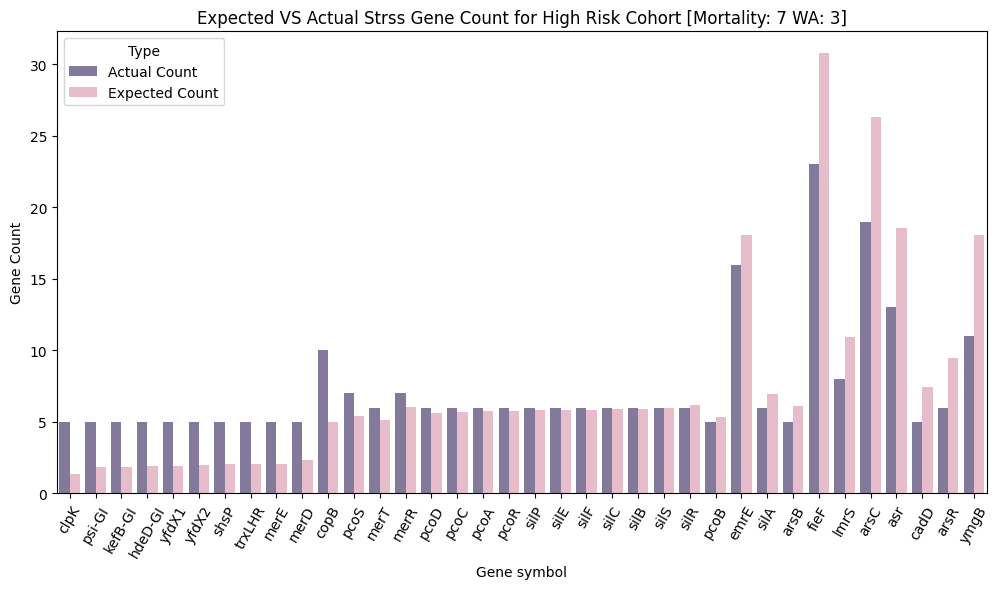

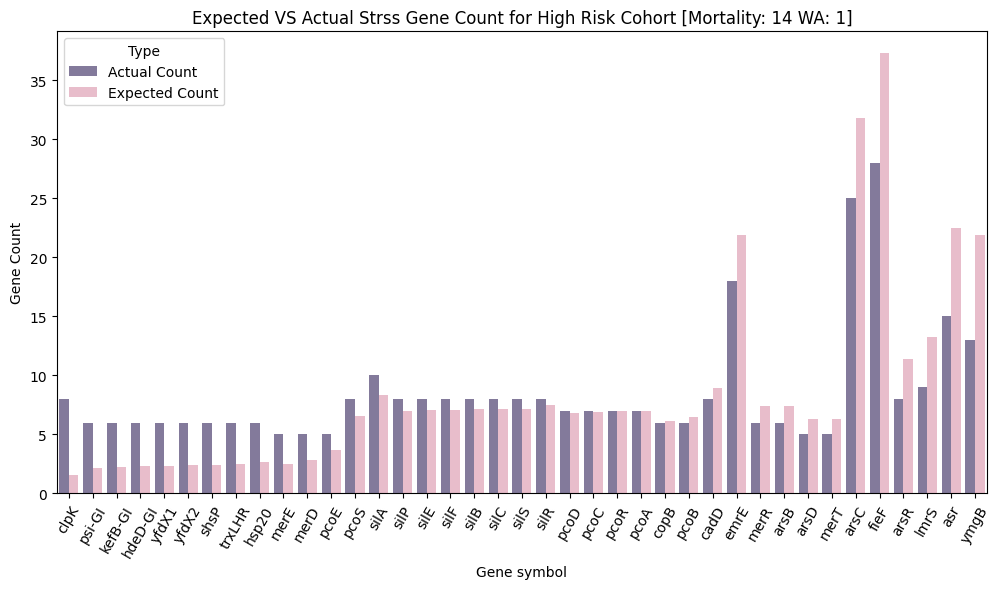

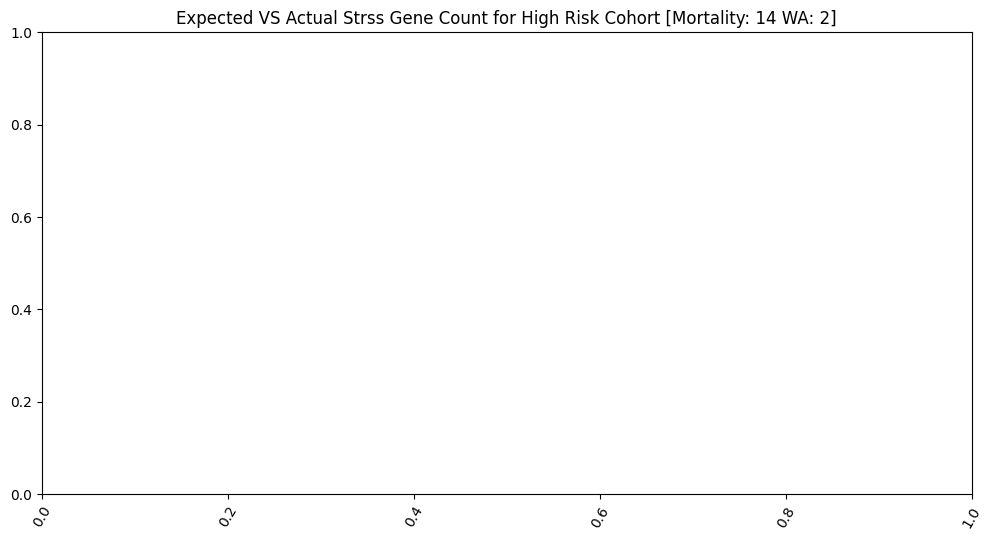

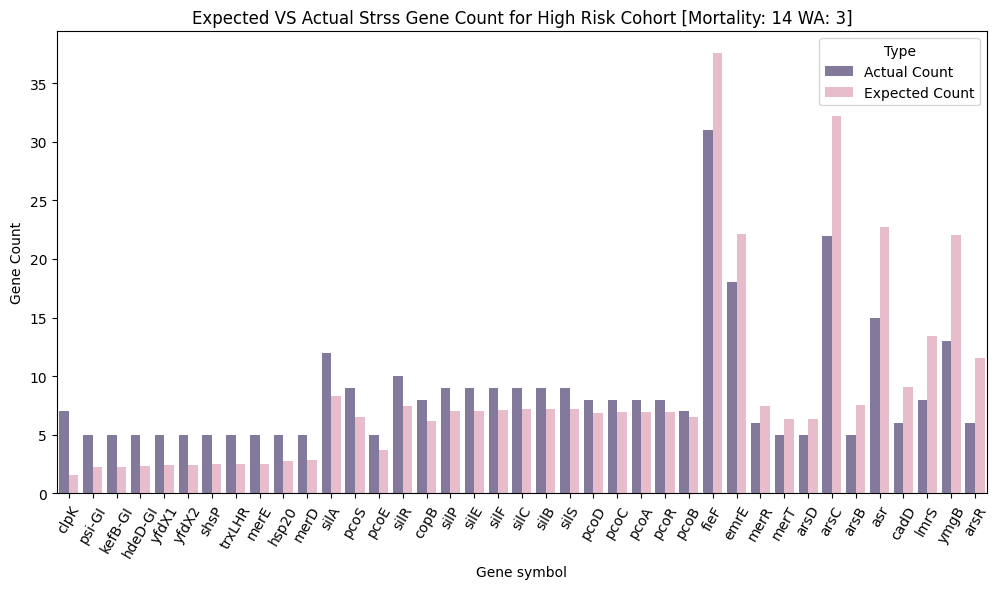

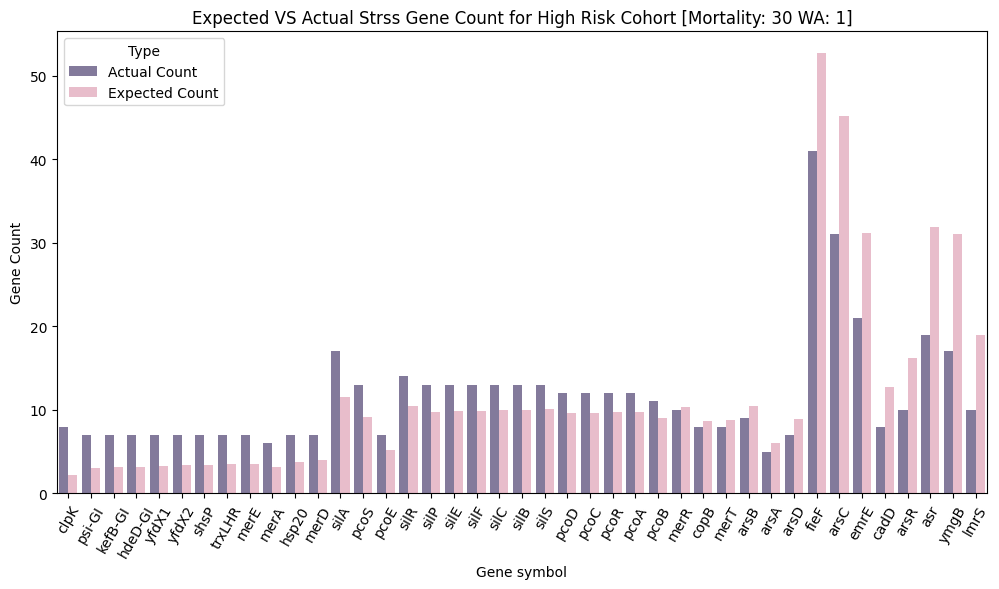

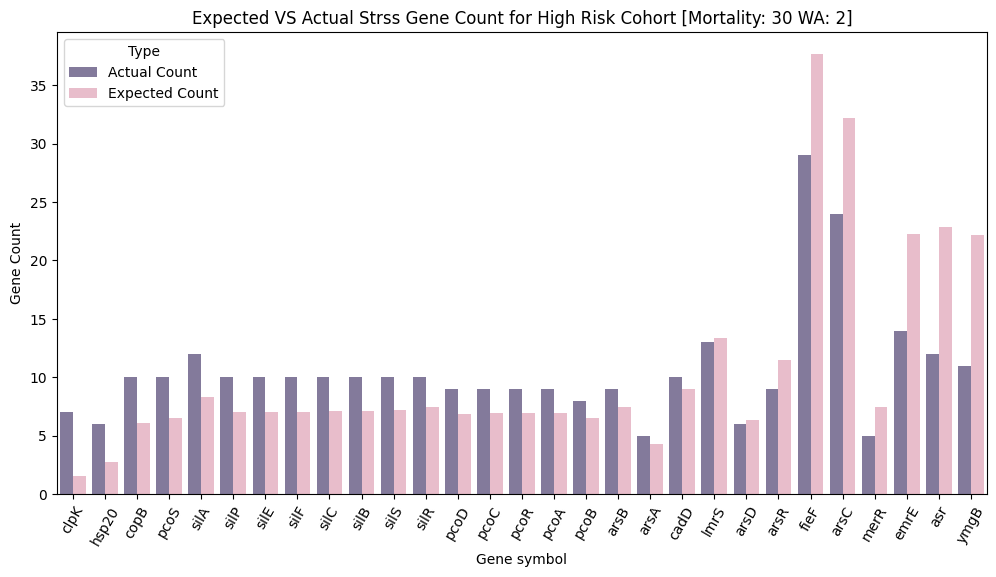

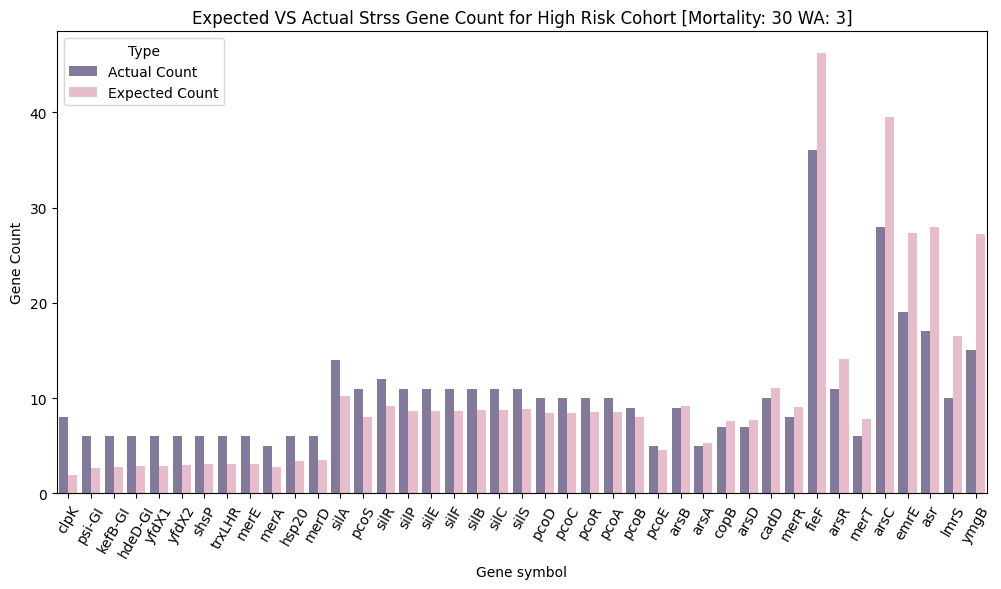

In [77]:
import seaborn as sns
from matplotlib import pyplot as plt


for mortality in [7, 14, 30]:
    for wa in [1, 2, 3]:
        subplotDf = plotDf[((plotDf.mortality == mortality) & (plotDf.wa == wa))]

        fig, ax = plt.subplots(figsize=(12, 6))

        ax.tick_params(axis='x', labelrotation=60)
        ax.set_title('Expected VS Actual Strss Gene Count for High Risk Cohort [Mortality: ' + str(mortality) + ' WA: ' + str(wa) + ']')

        sns.barplot(
            data=subplotDf,
            x="Gene symbol",
            y="Gene Count",
            hue="Type",
            palette={'Actual Count': '#8174A0', 'Expected Count': '#EFB6C8'},
        )
        plt.show()